In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
df=pd.read_csv("customer_segmentation.csv")

In [4]:
#Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#Display the column names of the dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#Display the shape of the dataset
df.shape

(2240, 29)

In [7]:
#Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
#Check for missing values in the dataset
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Remove rows with missing values
df.dropna(inplace=True)

In [10]:
#Verify that there are no missing values left
df.isna().sum().sum()

np.int64(0)

In [11]:
#Display statistical summary of the dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# Analyze the distribution of the 'Education' column
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [13]:
# Analyze the distribution of the 'Marital_Status' column
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
# Convert 'Dt_Customer' to datetime format
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [16]:
# Create a new column 'Age' based on 'Year_Birth'
df["Age"]=2025-df["Year_Birth"]

In [17]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [18]:
# Create a new column 'Total_Children' by summing 'Kidhome' and 'Teenhome'
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

In [19]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [20]:
# Define the list of spending columns
spend_cols=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [21]:
# Create a new column 'Total_Spending' by summing the specified spending columns
df["Total_Spending"]=df[spend_cols].sum(axis=1)

In [22]:
df["Total_Spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2216, dtype: int64

In [23]:
# Create a new column 'Customer_Since' representing the number of days since the customer joined
df["Customer_Since"]=(pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [24]:
df["Customer_Since"]

0       4790
1       4240
2       4439
3       4266
4       4288
        ... 
2235    4508
2236    4146
2237    4282
2238    4283
2239    4749
Name: Customer_Since, Length: 2216, dtype: int64

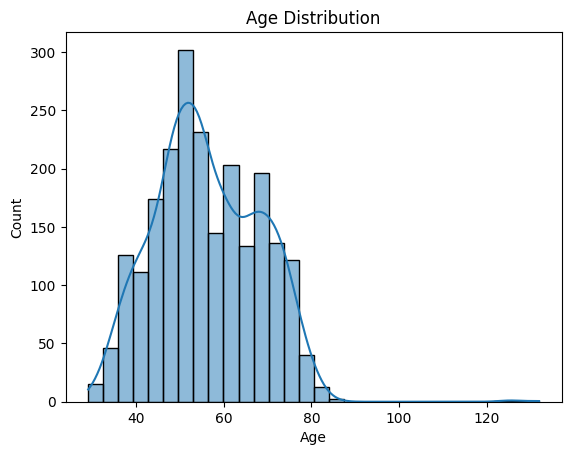

In [25]:
# Visualize the distribution of 'Age'
sns.histplot(df["Age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

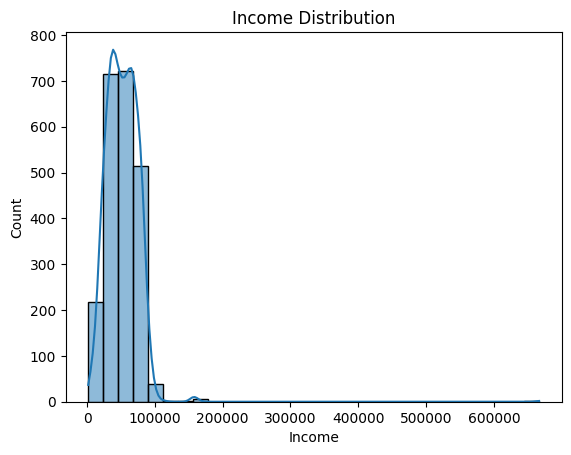

In [26]:
# Visualize the distribution of 'Income'
sns.histplot(df["Income"],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

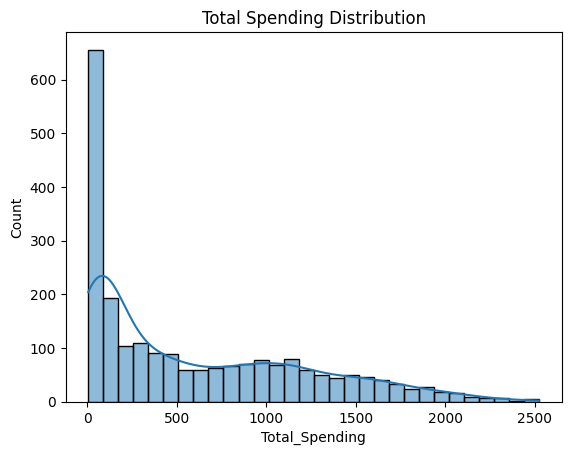

In [27]:
# Visualize the distribution of 'Total_Spending'
sns.histplot(df["Total_Spending"],bins=30,kde=True)
plt.title("Total Spending Distribution")
plt.show()

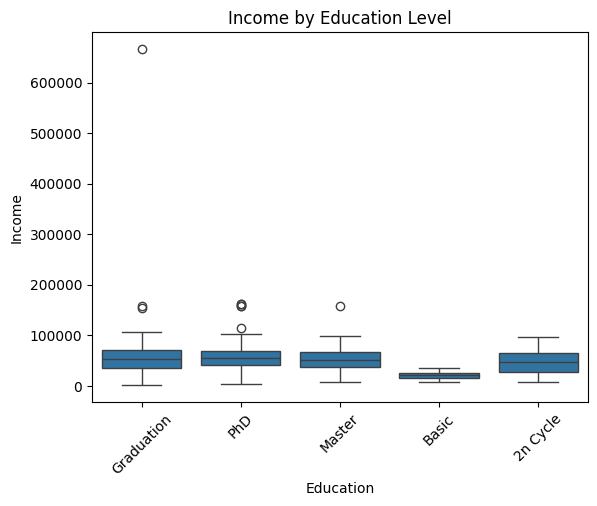

In [28]:
# Analyze the relationship between 'Education' and 'Income'
sns.boxplot(x="Education",y="Income",data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

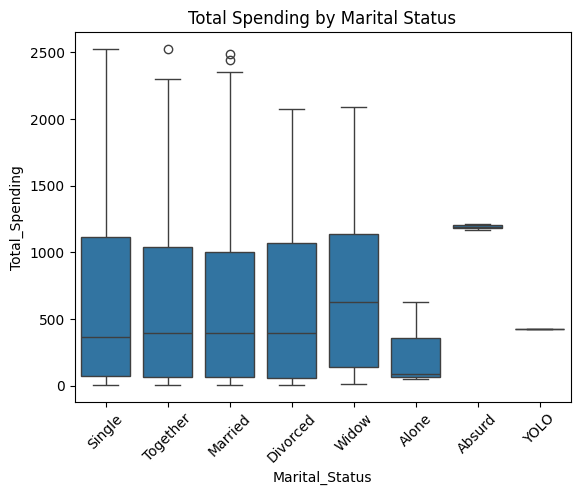

In [29]:
# Analyze the relationship between 'Marital_Status' and 'Total_Spending'
sns.boxplot(x="Marital_Status",y="Total_Spending",data=df)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")
plt.show()

In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [31]:
# Compute the correlation matrix for selected numerical features
corr=df[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()

In [32]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


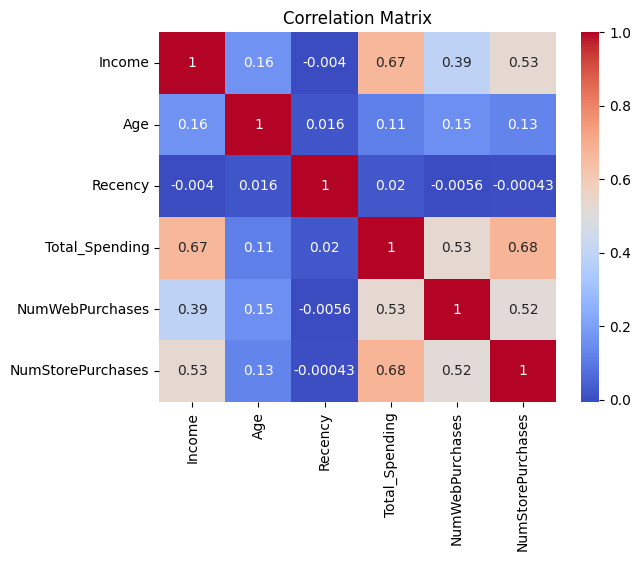

In [33]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [34]:
# Create a pivot table to analyze average income by education level and marital status
pivot_income= df.pivot_table(index="Education",values="Income",columns="Marital_Status",aggfunc="mean")

In [35]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


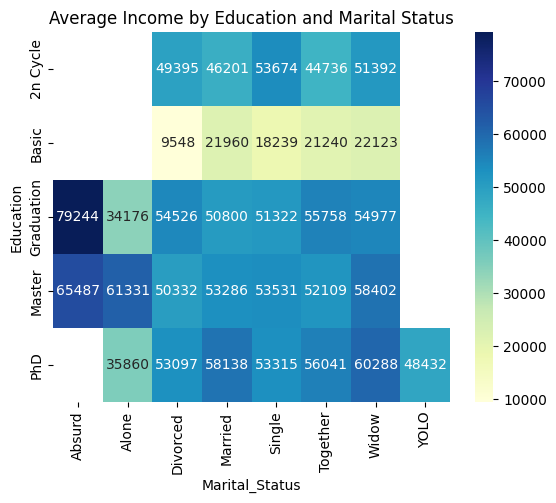

In [36]:
# Visualize the pivot table using a heatmap
sns.heatmap(pivot_income,annot=True,fmt=".0f",cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [37]:
# Group by 'Education' and calculate the mean 'Total_Spending', then sort in descending order
group1=df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)

In [38]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

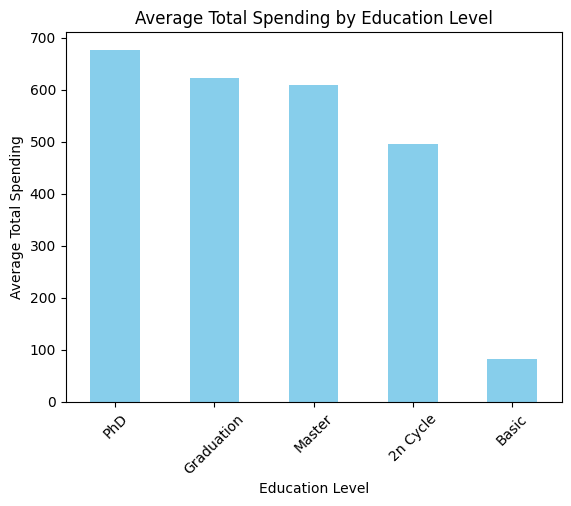

In [39]:
# Visualize the average total spending by education level using a bar chart
group1.plot(kind="bar",color="skyblue")
plt.title("Average Total Spending by Education Level")
plt.ylabel("Average Total Spending")
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.show()

In [40]:
# Create a new column 'AcceptedAny' to indicate if a customer accepted any campaign
df["AcceptedAny"]=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [41]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [42]:
# Convert 'AcceptedAny' to binary (1 if accepted any campaign, 0 otherwise)
df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x: 1 if x>0 else 0)

In [43]:
df["AcceptedAny"].unique()

array([1, 0])

In [44]:
# Group by 'Marital_Status' and calculate the mean 'AcceptedAny', then sort in descending order
# This shows the acceptance rate of campaigns by marital status
group2=df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [45]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

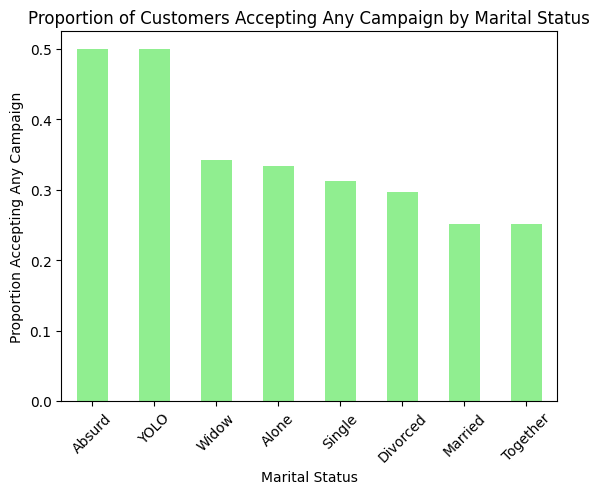

In [46]:
# Visualize the acceptance rate of campaigns by marital status using a bar chart
# The height of each bar represents the proportion of customers in that marital status who accepted at least
group2.plot(kind="bar",color="lightgreen")
plt.title("Proportion of Customers Accepting Any Campaign by Marital Status")
plt.ylabel("Proportion Accepting Any Campaign")
plt.xlabel("Marital Status")
plt.xticks(rotation=45)
plt.show()

In [47]:
# Create age bins and categorize 'Age' into these bins
bins=[10,30,40,50,60,70,90]

In [48]:
labels=["18-29","30-39","40-49","50-59","60-69","70+"]

In [49]:
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels)

In [50]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [51]:
# Group by 'AgeGroup' and calculate the mean 'Income'
# This shows the average income for each age group
group3=df.groupby("AgeGroup")["Income"].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20424\1029578339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3=df.groupby("AgeGroup")["Income"].mean()


In [52]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

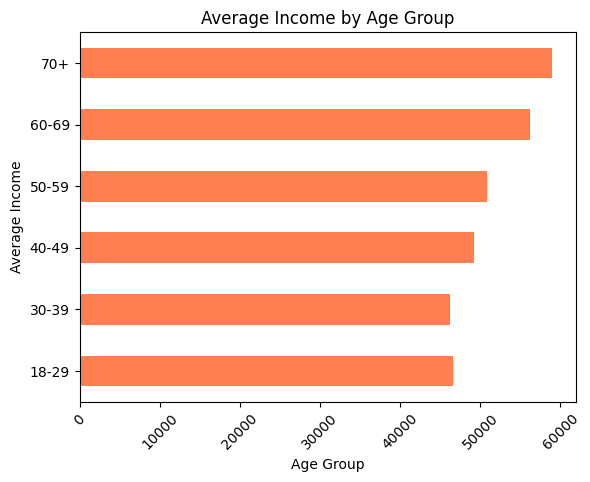

In [53]:
# Visualize the average income by age group using a horizontal bar chart
group3.plot(kind="barh",color="coral")
plt.title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()

In [54]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4790,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4240,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4439,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4266,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4288,0,40-49


In [55]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [56]:
# Define the features to be used for clustering
features=["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [57]:
X=df[features].copy()

In [58]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [59]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [60]:
X_scaled=scaler.fit_transform(X)

In [61]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [62]:
from sklearn.cluster import KMeans

In [63]:
wcss=[]

In [64]:
# Use the elbow method to determine the optimal number of clusters
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [65]:
wcss

[10218.635564151202,
 9007.783808892227,
 8158.819908588737,
 7635.803655237259,
 7110.045578511282,
 6885.8985938234,
 6152.124455917639,
 6101.925446925047]

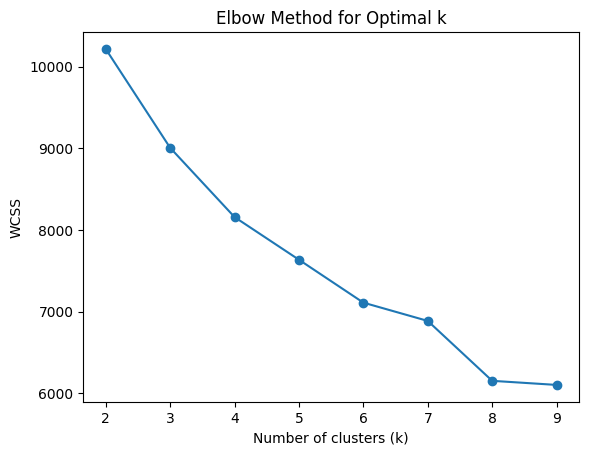

In [66]:
plt.plot(range(2,10),wcss,marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [67]:
kmeans=KMeans(n_clusters=6)
df["Clusters"]=kmeans.fit_predict(X_scaled)


In [68]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4790,1,60-69,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4240,0,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4439,0,50-59,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4266,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4288,0,40-49,3


In [69]:
clusters_summary=df.groupby("Clusters")[features].mean()

In [70]:
clusters_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,49.966592,32512.501114,91.454343,1.955457,3.091314,6.561247,23.935412
1,54.608315,79198.667396,1332.334792,4.234136,8.000000,2.185996,48.967177
2,60.740506,66975.439873,1144.060127,7.066456,10.477848,5.060127,58.550633
3,48.926893,32712.221932,116.060052,2.328982,3.232376,7.039164,75.785901
4,59.639881,55688.086310,688.699405,7.211310,6.229167,6.523810,33.669643
5,69.567273,45759.229091,210.770909,2.516364,4.250909,4.927273,60.530909


In [71]:
df["Clusters"].value_counts()

Clusters
1    457
0    449
3    383
4    336
2    316
5    275
Name: count, dtype: int64

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)
df["PCA1"],df["PCA2"]=pca_data[:,0],pca_data[:,1]

In [73]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

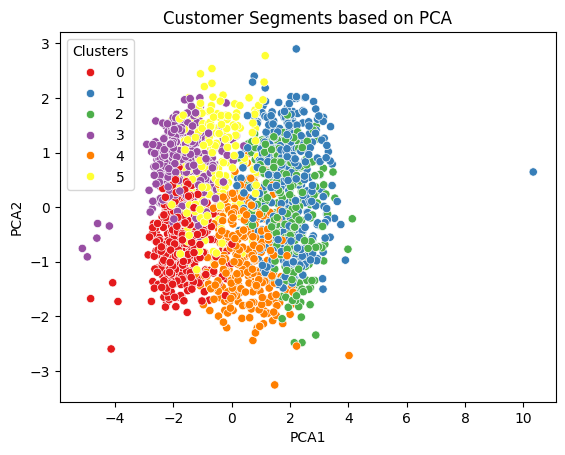

In [74]:
sns.scatterplot(x="PCA1",y="PCA2",hue="Clusters",data=df,palette="Set1")
plt.title("Customer Segments based on PCA")
plt.show()

In [75]:
clusters_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,49.966592,32512.501114,91.454343,1.955457,3.091314,6.561247,23.935412
1,54.608315,79198.667396,1332.334792,4.234136,8.000000,2.185996,48.967177
2,60.740506,66975.439873,1144.060127,7.066456,10.477848,5.060127,58.550633
3,48.926893,32712.221932,116.060052,2.328982,3.232376,7.039164,75.785901
4,59.639881,55688.086310,688.699405,7.211310,6.229167,6.523810,33.669643
5,69.567273,45759.229091,210.770909,2.516364,4.250909,4.927273,60.530909


In [76]:
import joblib
joblib.dump(kmeans,"kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']